# Phase 1: Subject Creation

**Description:**

This notebook is to act as the resulting summary file for the creation and upload of subjects for the IceCube Zooniverse project currently called *Name that Neutrino!*. The project is currently being maintained by Elizabeth Warrick (as of March 2023). In this notebook, we take the i3 file and run it through several filters. [note: describe more later].

> Nu Type: NuE

> Run: 22076

> SubRun: 000999

### Summary Stats:

To be filled in after completing process. Also need to figure out global variables. 

**Subject Set Name:**

In [1]:
#Imports

#My functions: 
from uniformenergydist_filter import *

#General:
import numpy as np
import sys
import os
import subprocess
import argparse
import csv
from tables import *
import pandas as pd
from matplotlib import pyplot as plt
import h5py

#Zooniverse:
from panoptes_client import Panoptes, Project, SubjectSet, Subject
import magic
import glob

#IceCube:
from icecube.icetray import I3Units
import icecube.MuonGun
from icecube import dataio, dataclasses, icetray, MuonGun
from I3Tray import *
from icecube.hdfwriter import I3HDFWriter
from mc_labeler import MCLabeler #make sure that mc_labeler script is in current directory. 

In [4]:
#Specify file paths:

#Initial I3 File:
nue = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/\
launch/Phase1/classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst'

#Desired output directory. Note that creation of this directory is not yet coded and is done manually. 
phase1_dir = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/'

In [5]:
#Run Filter 1 to label MC truth.
filter1(nue,phase1_dir)

/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/mc_labeler.py:523: UserWarning: Couldn't find OMKey in MCPESeriesMap
  warnings.warn("Couldn't find OMKey in MCPESeriesMap")


Note that the above cell might return an "exception" warning that the *MCPESeriesMap could not be found*. I am unsure why it does that because when I check the i3 file in dataio-shovel, I see the specified mc_pid_series_map (look at mc_labeler.py for exact name of specified key). The resulting file size should be around 400 MB. 

In [6]:
#Path of hdf from above filter.
nue_hdf = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/\
Phase1/mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst.hd5'

In [7]:
#Run uniformenergy_events function which requires hdf from filter 1, 
#number of bins, size of each random choice, and a random seed. 

uniformenergy_events(nue_hdf,25,10,12,subrun = True)

Number of Bins: 25
Number of Events per Bin: 10
Total Number of Events: 250
Initial Number of Events: 2706
Number of Events after filtering: 2639


/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniformenergydist_filter.py:176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['binned_log10E'] = pd.cut(x = np.log10(df_filtered['energy']), bins = bins, labels = labels, include_lowest = True) #might throw an error?


Please input subrun number:
999


The above function throws another warning about pd.cut, currently that is not a problem but I don't know if a new version of pandas will allow this. 

In [2]:
#Path to Random Events CSV
nue_csv = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/random_events_uniform_energy_distrib_22067_999.csv'

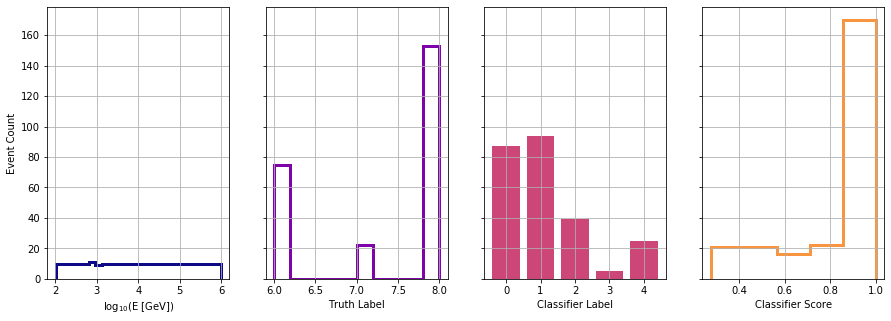

In [9]:
#Run event_characterization_plots function whick makes some quick 
#plots to get an idea of what data you're dealing with.
#Note that I want to update the plot types, maybe make a 2D histogram as Mike K suggested. 
#For truth labels, check out enums.py or in the .py file that holds the functions.

event_characterization_plots(nue_csv)

Now that we have the events for this phase chosen, we run the second filter to pick out only those events. 

In [10]:
#Path to i3 file from filter1 with MC truth labels. 
nue_filter1 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/\
launch/Phase1/mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst'

In [11]:
#Run function to perform second filter which passes through only selected event IDs chosen from 
#the uniformenergy_events function. 
filter2(nue_filter1,phase1_dir,nue_csv)

In [12]:
#Path to i3 file from filter 2 that holds only specified events. 
nue_filter2 = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst'

In [13]:
#Run function to perform third filter, which returns only the DAQ frames of the specified events.
#DAQ only file is then split up into many smaller i3 files since SteamShovel can't handle making videos of large
#i3 files at one time. Size limit is approx 2E6 MB (? unsure of units)
filter3(nue_filter2,22067_999,phase1_dir)

In [14]:
#Path to NuMu Daq Only folder
nue_daq = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/daq_22067999/'

In [15]:
get_steamshovel(nue_daq,22067999)#forgot to run with right run id

Finished Videos in: daq_only-0000_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst
Finished Videos in: daq_only-0004_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst
Finished Videos in: daq_only-0001_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst
Finished Videos in: daq_only-0007_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst
Finished Videos in: daq_only-0006_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst
Finished Videos in: daq_only-0005_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst
Finished Videos in: daq_only-0002_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst
Finished Videos in: daq_only-0003_uniform_energy_mc_labeled_classifier_rehyd_DST_IC86.2020_NuE.022067.000999.i3.zst


Ideas for Compression:
- Use GUI to add files to queue and send to one compression folder.
- Add a subprocess line in movie script to compress the video after making it and direct it to save in the compression folder. 

In [5]:
compressed_path = '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_22067999/'

Can't get manifest yet since some subjects are missing and lining it up won't work. 

In [6]:
get_manifest(compressed_path,nue_csv)

{'/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_22067999/compressed_run_22067_event_6194_origidx_18_RF22.mp4': {'event': 6194,
  'run': 22067,
  'truth_classification': 8,
  'pred_skim': 0.9993646740913392,
  'pred_cascade': 1.194558535644319e-06,
  'pred_tgtrack': 0.0002963375300168,
  'pred_starttrack': 4.303083187551238e-06,
  'pred_stoptrack': 0.0003334578068461,
  'energy': 65572.22449690437,
  'zenith': 1.7196803348401408,
  'oneweight': 40765942011631.016,
  'truth_classification_label': 'uncontained_cascade',
  'max_score_val': 0.9993646740913392,
  'idx_max_score': 'pred_skim',
  'binned_log10E': 18},
 '/home/icecube/Desktop/eliz_zooniverse/icecubezooniverseproj_ver3/launch/Phase1/compressed_22067999/compressed_run_22067_event_3754_origidx_7_RF22.mp4': {'event': 3754,
  'run': 22067,
  'truth_classification': 8,
  'pred_skim': 0.9998250603675842,
  'pred_cascade': 2.542408878980496e-07,
  'pred_tgtrack': 1.0187549378315452e-05,
  'pr

In [7]:
make_subject_set('nue_run_22067_subrun_999_phase1')

Subject Set Name: nue_run_22067_subrun_999_phase1
Subject Set ID: 112118
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112116>, <SubjectSet 112109>]


In [8]:
uploader(compressed_path,nue_csv,112118)

Confirm if subject set 112118 is listed below.
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112116>, <SubjectSet 112109>]
[<SubjectSet 106374>, <SubjectSet 107341>, <SubjectSet 106373>, <SubjectSet 107347>, <SubjectSet 111475>, <SubjectSet 111473>, <SubjectSet 112116>, <SubjectSet 112109>]
Number of times loop has ran: 1
Number of times loop has ran: 2
Number of times loop has ran: 3
Number of times loop has ran: 4
Number of times loop has ran: 5
Number of times loop has ran: 6
Number of times loop has ran: 7
Number of times loop has ran: 8
Number of times loop has ran: 9
Number of times loop has ran: 10
Number of times loop has ran: 11
Number of times loop has ran: 12
Number of times loop has ran: 13
Number of times loop has ran: 14
Number of times loop has ran: 15
Number of times loop has ran: 16
Number of times loop has ran: 17
Number of times loop has ran: 18
Number of times loop has ran: 